In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNC

In [6]:
zoo = pd.read_csv("zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


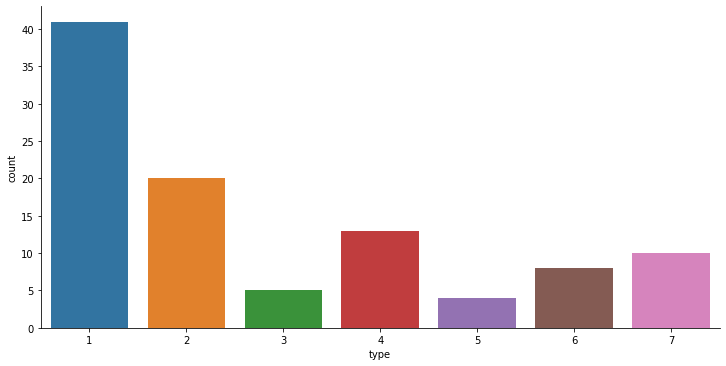

In [8]:
sns.catplot('type',data=zoo,kind='count',height=5,aspect=2)

In [19]:
# Train and Test data
from sklearn.model_selection import train_test_split
train,test = train_test_split(zoo,test_size=0.2,random_state=1)

In [20]:
acc = []
for i in range(3,26,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,1:17],train.iloc[:,17])
    train_acc = np.mean(neigh.predict(train.iloc[:,1:17])==train.iloc[:,17])
    test_acc = np.mean(neigh.predict(test.iloc[:,1:17])==test.iloc[:,17])
    acc.append([train_acc,test_acc])
    
    
print(acc)
print(len(acc))


[[0.9625, 0.9523809523809523], [0.8875, 0.9047619047619048], [0.8375, 0.8095238095238095], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.775, 0.7142857142857143], [0.775, 0.7142857142857143], [0.775, 0.7142857142857143], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619]]
12


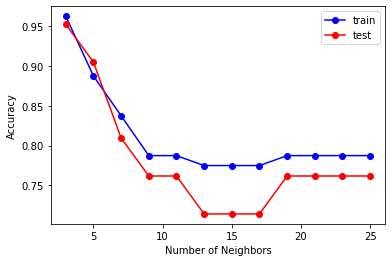

In [21]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,26,2),[i[0] for i in acc],"bo-")

# test accuracy plot
plt.plot(np.arange(3,26,2),[i[1] for i in acc],"ro-")

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(["train","test"])
plt.show()

In [22]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

# for 3 nearest neighbours 
neigh = KNC(n_neighbors= 3)

# Fitting with training data 
neigh.fit(train.iloc[:,1:17],train.iloc[:,17])

# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,1:17])==train.iloc[:,17]) 

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,1:17])==test.iloc[:,17]) 

print("k=3:-\n","Train Accuracy:",train_acc,"\nTest Accuracy",test_acc)

k=3:-
 Train Accuracy: 0.9625 
Test Accuracy 0.9523809523809523


In [23]:
# for 5 nearest neighbours 
neigh = KNC(n_neighbors= 5)

# Fitting with training data 
neigh.fit(train.iloc[:,1:17],train.iloc[:,17])

# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,1:17])==train.iloc[:,17]) # 94 %

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,1:17])==test.iloc[:,17]) # 100%

print("k=5:-\n","Train Accuracy:",train_acc,"\nTest Accuracy",test_acc)

k=5:-
 Train Accuracy: 0.8875 
Test Accuracy 0.9047619047619048


In [24]:
x_train=train.iloc[:,1:17]
y_train=train.iloc[:,17]

x_test=test.iloc[:,1:17]
y_test=test.iloc[:,17]

In [25]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = neigh.predict(x_test)

In [26]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0,  1,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  2]], dtype=int64)

In [27]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.72      0.82      0.74        21
weighted avg       0.92      0.90      0.90        21



C:\Users\sande\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
